
<a id='arellano'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Default Risk and Income Fluctuations

## Contents

- [Default Risk and Income Fluctuations](#Default-Risk-and-Income-Fluctuations)  
  - [Overview](#Overview)  
  - [Structure](#Structure)  
  - [Equilibrium](#Equilibrium)  
  - [Computation](#Computation)  
  - [Results](#Results)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

In addition what’s in Anaconda, this lecture will need the following libraries

In [1]:
!pip install quantecon

## Overview

This lecture computes versions of  Arellano’s  [[Are08]](https://lectures.quantecon.org/py/zreferences.html#arellano2008default) model of sovereign default

The model describes interactions among default risk, output,  and  an equilibrium interest rate  that includes a premium for endogenous default risk

The decision maker is a government of a small open economy that borrows from risk-neutral foreign creditors

The foreign lenders must be compensated for default risk

The government borrows and lends abroad in order to  smooth the consumption of its citizens

The government repays its debt only if it wants to, but declining to pay has adverse consequences

The interest rate on government debt adjusts in response to the state-dependent default probability chosen by government

The model yields outcomes that help interpret sovereign default experiences, including

- countercyclical interest rates on sovereign debt  
- countercyclical trade balances  
- high volatility of consumption relative to output  


Notably, long recessions caused by bad draws in the income process increase the government’s incentive to default

This can lead to

- spikes in interest rates  
- temporary losses of access to international credit markets  
- large drops in output, consumption, and welfare  
- large capital outflows during recessions  


Such dynamics are consistent with experiences of many countries

## Structure

In this section we describe the main features of the model

### Output, Consumption and Debt

A small open economy is endowed with an exogenous stochastically fluctuating potential output stream $ \{y_t\} $

Potential output is realized only in periods in which the government honors its sovereign debt

The output good can be traded or consumed

The sequence $ \{y_t\} $ is described by a Markov process with stochastic density kernel $ p(y, y') $

Households within the country are identical and rank stochastic consumption streams according to


<a id='equation-utility'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t u(c_t) \tag{1}
$$

Here

- $ 0 < \beta < 1 $ is a time discount factor  
- $ u $ is an increasing and strictly concave utility function  


Consumption sequences enjoyed by households are affected by the government’s decision to borrow or lend internationally

The government is benevolent in the sense that its aim is to maximize [(1)](#equation-utility)

The government is the only domestic actor with access to foreign credit

Because household are averse to consumption fluctuations, the government will try to smooth consumption by borrowing from (and lending to) foreign creditors

### Asset Markets

The only credit instrument available to the government is a one-period bond traded in international credit markets

The bond market has the following features

- The bond matures in one period and is not state contingent  
- A purchase of a bond with face value $ B' $ is a claim to $ B' $ units of the
  consumption good next period  
- To purchase $ B' $  next period costs $ q B' $ now, or, what is equivalent  
- For selling $ -B' $ units of next period goods the seller earns $ - q B' $ of today’s goods  
  
  - if $ B' < 0 $, then $ -q B' $ units of the good are received in the current period, for a promise to repay $ -B' $ units next period  
  - there is an equilibrium  price function $ q(B', y) $ that makes $ q $ depend on both $ B' $ and $ y $  
  


Earnings on the government portfolio are distributed (or, if negative, taxed) lump sum to households

When the government is not excluded from financial markets, the one-period national budget constraint is


<a id='equation-resource'></a>
$$
c = y + B - q(B', y) B' \tag{2}
$$

Here and below, a prime denotes a next period value or a claim maturing next period

To rule out Ponzi schemes, we also require that $ B \geq -Z $ in every period

- $ Z $ is chosen to be sufficiently large that the constraint never binds in equilibrium  

### Financial Markets

Foreign creditors

- are risk neutral  
- know the domestic output stochastic process $ \{y_t\} $ and observe $ y_t, y_{t-1}, \ldots, $ at time $ t $  
- can borrow or lend without limit in an international credit market at a constant international interest rate $ r $  
- receive full payment if the government chooses to pay  
- receive zero if the government defaults on its one-period debt due  


When a government is expected to default next period with  probability $ \delta $,  the expected value of a promise to pay one unit of consumption next period is $ 1 - \delta $

Therefore, the discounted expected value of a promise to pay $ B $ next period is


<a id='equation-epc'></a>
$$
q = \frac{1 - \delta}{1 + r} \tag{3}
$$

Next we turn to how the government in effect chooses the default probability $ \delta $

### Government’s decisions

At each point in time $ t $, the government chooses between

1. defaulting  
1. meeting its current obligations and purchasing or selling an optimal quantity of  one-period sovereign debt  


Defaulting means declining to repay all of  its current obligations

If the government defaults in the current period, then consumption equals current output

But a sovereign default has two consequences:

1. Output immediately falls from $ y $ to $ h(y) $, where $ 0 \leq h(y) \leq y $  
  
  - it returns to $ y $ only after the country regains access to  international credit markets  
  
1. The country loses access to foreign credit markets  

### Reentering international credit market

While in a state of default, the economy regains access to
foreign credit in each subsequent period with probability
$ \theta $

## Equilibrium

Informally, an equilibrium is a sequence of interest rates on its sovereign debt, a stochastic sequence of government default decisions  and an implied flow of household consumption such that

1. Consumption and assets satisfy the national budget constraint  
1. The government maximizes household utility taking into account  
  - the resource constraint  
  - the effect of its choices on the price of bonds  
  - consequences of defaulting now for future net output and future borrowing and lending opportunities  
1. The interest rate on the government’s debt includes a risk-premium sufficient to make foreign creditors expect on average to earn the constant risk-free international interest rate  


To express these ideas more precisely, consider first the choices of the
government, which

1. enters a period with initial assets $ B $, or  what is the same thing, initial debt to be repaid now of $ -B $  
1. observes current output $ y $, and  
1. chooses either  
  
  1. to default, or  
  1. to pay  $ -B $ and set next period’s debt due to $ -B' $  
  


In a  recursive formulation,

- state variables for the government comprise the pair $ (B, y) $  
- $ v(B, y) $ is the optimum value of the government’s problem when at the beginning of a period  it faces the choice of whether to honor or default  
- $ v_c(B, y) $ is the value of choosing to pay obligations falling due  
- $ v_d(y) $ is the value of choosing to default  


$ v_d(y) $ does not depend on $ B $ because, when access to credit is eventually regained, net foreign assets equal $ 0 $

Expressed recursively, the value of defaulting is

$$
v_d(y) = u(h(y)) +
            \beta \int \left\{
            \theta v(0, y') + (1 - \theta) v_d(y')
            \right\}
            p(y, y') dy'
$$

The value of paying is

$$
v_c(B, y) = \max_{B' \geq -Z}
       \left\{
            u(y - q(B', y) B' + B) +
            \beta \int v(B', y') p(y, y') dy'
      \right\}
$$

The three value functions are linked by

$$
v(B, y) = \max\{ v_c(B, y), v_d(y) \}
$$

The government chooses to default when

$$
v_c(B, y) < v_d(y)
$$

and hence given $ B' $ the probability of default next period  is


<a id='equation-delta'></a>
$$
\delta(B', y) := \int \mathbb 1\{v_c(B', y') < v_d(y') \} p(y, y') dy' \tag{4}
$$

Given zero profits for foreign creditors in equilibrium, we can combine [(3)](#equation-epc) and [(4)](#equation-delta) to pin down
the bond price function:


<a id='equation-bondprice'></a>
$$
q(B', y) = \frac{1 - \delta(B', y)}{1 + r} \tag{5}
$$

### Definition of equilibrium

An *equilibrium* is

- a  pricing function $ q(B',y) $,  
- a triple of value functions $ (v_c(B, y), v_d(y), v(B,y)) $,  
- a decision rule telling the government when to default and when to pay as a function of the state  $ (B, y) $, and  
- an asset accumulation rule that, conditional on choosing not to  default,  maps $ (B,y) $ into $ B' $  


such that

- The three Bellman equations for $ (v_c(B, y), v_d(y), v(B,y)) $ are satisfied  
- Given the price function $ q(B',y) $, the default decision rule and the asset accumulation decision rule attain the optimal value function  $ v(B,y) $, and  
- The price function $ q(B',y) $ satisfies equation [(5)](#equation-bondprice)  

## Computation

Let’s now compute an equilibrium of Arellano’s model

The equilibrium objects are the value function $ v(B, y) $, the associated default decision rule, and the pricing function $ q(B', y) $

We’ll use our code to replicate Arellano’s results

After that we’ll perform some additional simulations

The majority of the code below was written by [Chase Coleman](https://github.com/cc7768)

It uses a slightly modified version of the algorithm recommended by Arellano

- The appendix to [[Are08]](https://lectures.quantecon.org/py/zreferences.html#arellano2008default) recommends
  value function iteration until convergence, updating the price, and then repeating  
- Instead, we update the bond price at every value function iteration step  


The second approach is faster and the two different procedures deliver very similar results

Here is a more detailed description of our algorithm:

1. Guess a value function $ v(B, y) $ and price function $ q(B', y) $  
1. At each pair $ (B, y) $,  
  - update the value of defaulting $ v_d(y) $  
  - update the value of continuing $ v_c(B, y) $  
1. Update the value function $ v(B, y) $, the default rule,  the implied ex ante default probability,  and the price function  
1. Check for convergence. If converged, stop – if not, go to step 2  


We use simple discretization on a grid of asset holdings and income levels

The output process is discretized using [Tauchen’s quadrature method](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/markov/approximation.py)

[Numba](https://lectures.quantecon.org/py/numba.html#numba-link) has been used in two places to speed up the code

In [2]:
"""

Authors: Chase Coleman, John Stachurski

"""
import numpy as np
import random
import quantecon as qe
from numba import jit


class Arellano_Economy:
    """
    Arellano 2008 deals with a small open economy whose government
    invests in foreign assets in order to smooth the consumption of
    domestic households. Domestic households receive a stochastic
    path of income.

    Parameters
    ----------
    β : float
        Time discounting parameter
    γ : float
        Risk-aversion parameter
    r : float
        int lending rate
    ρ : float
        Persistence in the income process
    η : float
        Standard deviation of the income process
    θ : float
        Probability of re-entering financial markets in each period
    ny : int
        Number of points in y grid
    nB : int
        Number of points in B grid
    tol : float
        Error tolerance in iteration
    maxit : int
        Maximum number of iterations
    """

    def __init__(self,
                 β=.953,         # time discount rate
                 γ=2.,           # risk aversion
                 r=0.017,        # international interest rate
                 ρ=.945,         # persistence in output
                 η=0.025,        # st dev of output shock
                 θ=0.282,        # prob of regaining access
                 ny=21,          # number of points in y grid
                 nB=251,         # number of points in B grid
                 tol=1e-8,       # error tolerance in iteration
                 maxit=10000):

        # Save parameters
        self.β, self.γ, self.r = β, γ, r
        self.ρ, self.η, self.θ = ρ, η, θ
        self.ny, self.nB = ny, nB

        # Create grids and discretize Markov process
        self.Bgrid = np.linspace(-.45, .45, nB)
        self.mc = qe.markov.tauchen(ρ, η, 3, ny)
        self.ygrid = np.exp(self.mc.state_values)
        self.Py = self.mc.P

        # Output when in default
        ymean = np.mean(self.ygrid)
        self.def_y = np.minimum(0.969 * ymean, self.ygrid)

        # Allocate memory
        self.Vd = np.zeros(ny)
        self.Vc = np.zeros((ny, nB))
        self.V = np.zeros((ny, nB))
        self.Q = np.ones((ny, nB)) * .95  # Initial guess for prices
        self.default_prob = np.empty((ny, nB))

        # Compute the value functions, prices, and default prob
        self.solve(tol=tol, maxit=maxit)
        # Compute the optimal savings policy conditional on no default
        self.compute_savings_policy()

    def solve(self, tol=1e-8, maxit=10000):
        # Iteration Stuff
        it = 0
        dist = 10.

        # Alloc memory to store next iterate of value function
        V_upd = np.zeros((self.ny, self.nB))

        # == Main loop == #
        while dist > tol and maxit > it:

            # Compute expectations for this iteration
            Vs = self.V, self.Vd, self.Vc
            EV, EVd, EVc = (self.Py @ v for v in Vs)

            # Run inner loop to update value functions Vc and Vd.
            # Note that Vc and Vd are updated in place.  Other objects
            # are not modified.
            _inner_loop(self.ygrid, self.def_y,
                        self.Bgrid, self.Vd, self.Vc,
                        EVc, EVd, EV, self.Q,
                        self.β, self.θ, self.γ)

            # Update prices
            Vd_compat = np.repeat(self.Vd, self.nB).reshape(self.ny, self.nB)
            default_states = Vd_compat > self.Vc
            self.default_prob[:, :] = self.Py @ default_states
            self.Q[:, :] = (1 - self.default_prob)/(1 + self.r)

            # Update main value function and distance
            V_upd[:, :] = np.maximum(self.Vc, Vd_compat)
            dist = np.max(np.abs(V_upd - self.V))
            self.V[:, :] = V_upd[:, :]

            it += 1
            if it % 25 == 0:
                print(f"Running iteration {it} with dist of {dist}")

        return None

    def compute_savings_policy(self):
        """
        Compute optimal savings B' conditional on not defaulting.
        The policy is recorded as an index value in Bgrid.
        """

        # Allocate memory
        self.next_B_index = np.empty((self.ny, self.nB))
        EV = self.Py @ self.V

        _compute_savings_policy(self.ygrid, self.Bgrid, self.Q, EV,
                                self.γ, self.β, self.next_B_index)

    def simulate(self, T, y_init=None, B_init=None):
        """
        Simulate time series for output, consumption, B'.
        """
        # Find index i such that Bgrid[i] is near 0
        zero_B_index = np.searchsorted(self.Bgrid, 0)

        if y_init is None:
            # Set to index near the mean of the ygrid
            y_init = np.searchsorted(self.ygrid, self.ygrid.mean())
        if B_init is None:
            B_init = zero_B_index
        # Start off not in default
        in_default = False

        y_sim_indices = self.mc.simulate_indices(T, init=y_init)
        B_sim_indices = np.empty(T, dtype=np.int64)
        B_sim_indices[0] = B_init
        q_sim = np.empty(T)
        in_default_series = np.zeros(T, dtype=np.int64)

        for t in range(T-1):
            yi, Bi = y_sim_indices[t], B_sim_indices[t]
            if not in_default:
                if self.Vc[yi, Bi] < self.Vd[yi]:
                    in_default = True
                    Bi_next = zero_B_index
                else:
                    new_index = self.next_B_index[yi, Bi]
                    Bi_next = new_index
            else:
                in_default_series[t] = 1
                Bi_next = zero_B_index
                if random.uniform(0, 1) < self.θ:
                    in_default = False
            B_sim_indices[t+1] = Bi_next
            q_sim[t] = self.Q[yi, int(Bi_next)]

        q_sim[-1] = q_sim[-2]  # Extrapolate for the last price
        return_vecs = (self.ygrid[y_sim_indices],
                       self.Bgrid[B_sim_indices],
                       q_sim,
                       in_default_series)

        return return_vecs


@jit(nopython=True)
def u(c, γ):
    return c**(1-γ)/(1-γ)


@jit(nopython=True)
def _inner_loop(ygrid, def_y, Bgrid, Vd, Vc, EVc,
                EVd, EV, qq, β, θ, γ):
    """
    This is a numba version of the inner loop of the solve in the
    Arellano class. It updates Vd and Vc in place.
    """
    ny, nB = len(ygrid), len(Bgrid)
    zero_ind = nB // 2  # Integer division
    for iy in range(ny):
        y = ygrid[iy]   # Pull out current y

        # Compute Vd
        Vd[iy] = u(def_y[iy], γ) + \
                β * (θ * EVc[iy, zero_ind] + (1 - θ) * EVd[iy])

        # Compute Vc
        for ib in range(nB):
            B = Bgrid[ib]  # Pull out current B

            current_max = -1e14
            for ib_next in range(nB):
                c = max(y - qq[iy, ib_next] * Bgrid[ib_next] + B, 1e-14)
                m = u(c, γ) + β * EV[iy, ib_next]
                if m > current_max:
                    current_max = m
            Vc[iy, ib] = current_max

    return None


@jit(nopython=True)
def _compute_savings_policy(ygrid, Bgrid, Q, EV, γ, β, next_B_index):
    # Compute best index in Bgrid given iy, ib
    ny, nB = len(ygrid), len(Bgrid)
    for iy in range(ny):
        y = ygrid[iy]
        for ib in range(nB):
            B = Bgrid[ib]
            current_max = -1e10
            for ib_next in range(nB):
                c = max(y - Q[iy, ib_next] * Bgrid[ib_next] + B, 1e-14)
                m = u(c, γ) + β * EV[iy, ib_next]
                if m > current_max:
                    current_max = m
                    current_max_index = ib_next
            next_B_index[iy, ib] = current_max_index
    return None

## Results

Let’s start by trying to replicate the results obtained in [[Are08]](https://lectures.quantecon.org/py/zreferences.html#arellano2008default)

In what follows, all results are computed using Arellano’s parameter values

The values can be seen in the `__init__` method of the `Arellano_Economy` shown above

- For example, `r=0.017` matches the average quarterly rate on a 5 year US treasury
  over the period 1983–2001  


Details on how to compute the figures are reported as solutions to the exercises

The first figure shows the bond price schedule and replicates Figure 3 of Arellano, where $ y_L $ and $ Y_H $ are particular below average and above average values of output $ y $

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/figures/arellano_bond_prices.png" style="">

  
- $ y_L $ is 5% below the mean of the $ y $ grid values  
- $ y_H $ is 5% above  the mean of the $ y $ grid values  


The grid used to compute this figure was relatively coarse (`ny, nB = 21, 251`) in order to match Arrelano’s findings

Here’s the same relationships computed on a finer grid (`ny, nB = 51, 551`)

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/figures/arellano_bond_prices_2.png" style="">

  
In either case, the figure shows that

- Higher levels of debt (larger $ -B' $) induce larger discounts on the face value, which correspond to  higher interest rates  
- Lower income also causes more discounting, as foreign creditors anticipate greater likelihood of default  


The next figure plots value functions and replicates the right hand panel of Figure 4 of [[Are08]](https://lectures.quantecon.org/py/zreferences.html#arellano2008default)

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/figures/arellano_value_funcs.png" style="">

  
We can use the results of the computation to study the default probability
$ \delta(B', y) $ defined in [(4)](#equation-delta)

The next plot shows these default probabilities over $ (B', y) $ as a heat
map

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/figures/arellano_default_probs.png" style="">

  
As anticipated, the probability that the government chooses to default in the
following period increases with indebtedness and falls with income

Next let’s run a time series simulation of $ \{y_t\} $, $ \{B_t\} $ and $ q(B_{t+1}, y_t) $

The grey vertical bars correspond to periods when the economy is excluded from financial markets because of a past default

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/figures/arellano_time_series.png" style="">

  
One notable feature of the simulated data is the nonlinear response of interest rates

Periods of relative stability are followed by sharp spikes in the discount rate on government debt

## Exercises


<a id='arellano-ex1'></a>

### Exercise 1

To the extent that you can, replicate the figures shown above

- Use the parameter values listed as defaults in the `__init__` method of the `Arellano_Economy`  
- The time series will of course vary depending on the shock draws  

## Solutions

Compute the value function, policy and equilibrium prices

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

ae = Arellano_Economy(β=.953,        # time discount rate
                      γ=2.,          # risk aversion
                      r=0.017,       # international interest rate
                      ρ=.945,        # persistence in output
                      η=0.025,       # st dev of output shock
                      θ=0.282,       # prob of regaining access
                      ny=21,         # number of points in y grid
                      nB=251,        # number of points in B grid
                      tol=1e-8,      # error tolerance in iteration
                      maxit=10000)

Running iteration 25 with dist of 0.34324232989002823


Running iteration 50 with dist of 0.09839155779848241


Running iteration 75 with dist of 0.029212095591656606


Running iteration 100 with dist of 0.00874510696905162


Running iteration 125 with dist of 0.002623141215579494


Running iteration 150 with dist of 0.0007871926699110077


Running iteration 175 with dist of 0.00023625911163449587


Running iteration 200 with dist of 7.091000628989264e-05


Running iteration 225 with dist of 2.1282821137447172e-05


Running iteration 250 with dist of 6.387802962137812e-06


Running iteration 275 with dist of 1.917228964032347e-06


Running iteration 300 with dist of 5.754352905285032e-07


Running iteration 325 with dist of 1.7271062091595013e-07


Running iteration 350 with dist of 5.1837215409022974e-08


Running iteration 375 with dist of 1.555838125000264e-08


Compute the bond price schedule as seen in figure 3 of Arellano (2008)

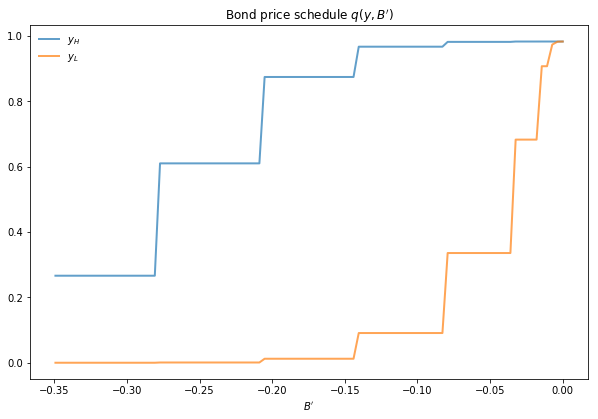

In [4]:
# Create "Y High" and "Y Low" values as 5% devs from mean
high, low = np.mean(ae.ygrid) * 1.05, np.mean(ae.ygrid) * .95
iy_high, iy_low = (np.searchsorted(ae.ygrid, x) for x in (high, low))

fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Bond price schedule $q(y, B')$")

# Extract a suitable plot grid
x = []
q_low = []
q_high = []
for i in range(ae.nB):
    b = ae.Bgrid[i]
    if -0.35 <= b <= 0:  # To match fig 3 of Arellano
        x.append(b)
        q_low.append(ae.Q[iy_low, i])
        q_high.append(ae.Q[iy_high, i])
ax.plot(x, q_high, label="$y_H$", lw=2, alpha=0.7)
ax.plot(x, q_low, label="$y_L$", lw=2, alpha=0.7)
ax.set_xlabel("$B'$")
ax.legend(loc='upper left', frameon=False)
plt.show()

Draw a plot of the value functions

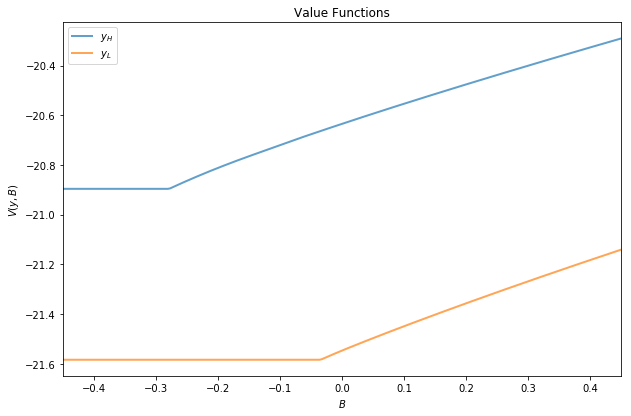

In [5]:
# Create "Y High" and "Y Low" values as 5% devs from mean
high, low = np.mean(ae.ygrid) * 1.05, np.mean(ae.ygrid) * .95
iy_high, iy_low = (np.searchsorted(ae.ygrid, x) for x in (high, low))

fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Value Functions")
ax.plot(ae.Bgrid, ae.V[iy_high], label="$y_H$", lw=2, alpha=0.7)
ax.plot(ae.Bgrid, ae.V[iy_low], label="$y_L$", lw=2, alpha=0.7)
ax.legend(loc='upper left')
ax.set(xlabel="$B$", ylabel="$V(y, B)$")
ax.set_xlim(ae.Bgrid.min(), ae.Bgrid.max())
plt.show()

Draw a heat map for default probability

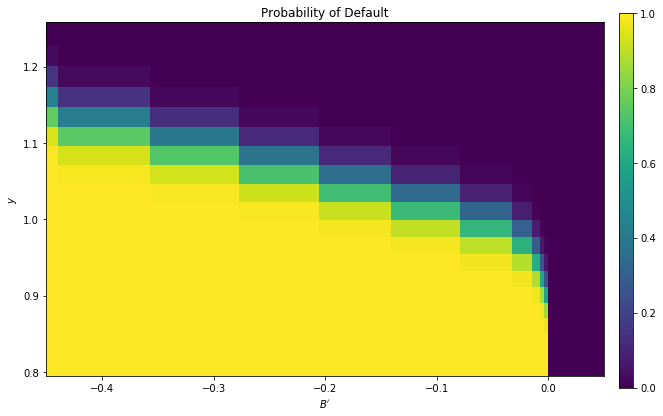

In [6]:
xx, yy = ae.Bgrid, ae.ygrid
zz = ae.default_prob

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.5))
hm = ax.pcolormesh(xx, yy, zz)
cax = fig.add_axes([.92, .1, .02, .8])
fig.colorbar(hm, cax=cax)
ax.axis([xx.min(), 0.05, yy.min(), yy.max()])
ax.set(xlabel="$B'$", ylabel="$y$", title="Probability of Default")
plt.show()

Plot a time series of major variables simulated from the model

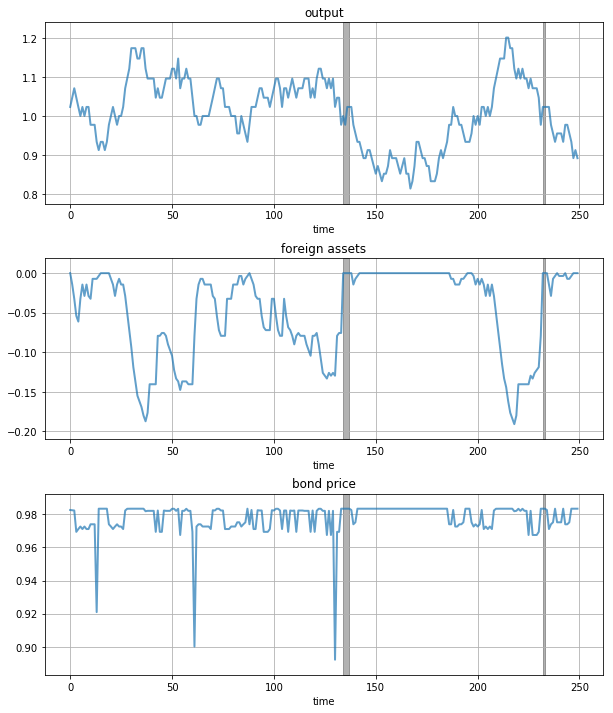

In [7]:
T = 250
y_vec, B_vec, q_vec, default_vec = ae.simulate(T)

# Pick up default start and end dates
start_end_pairs = []
i = 0
while i < len(default_vec):
    if default_vec[i] == 0:
        i += 1
    else:
        # If we get to here we're in default
        start_default = i
        while i < len(default_vec) and default_vec[i] == 1:
            i += 1
        end_default = i - 1
        start_end_pairs.append((start_default, end_default))

plot_series = y_vec, B_vec, q_vec
titles = 'output', 'foreign assets', 'bond price'

fig, axes = plt.subplots(len(plot_series), 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.3)

for ax, series, title in zip(axes, plot_series, titles):
    # determine suitable y limits
    s_max, s_min = max(series), min(series)
    s_range = s_max - s_min
    y_max = s_max + s_range * 0.1
    y_min = s_min - s_range * 0.1
    ax.set_ylim(y_min, y_max)
    for pair in start_end_pairs:
        ax.fill_between(pair, (y_min, y_min), (y_max, y_max),
                        color='k', alpha=0.3)
    ax.grid()
    ax.plot(range(T), series, lw=2, alpha=0.7)
    ax.set(title=title, xlabel="time")

plt.show()